<a href="https://colab.research.google.com/github/plaban1981/NLP-with-Python/blob/master/Chatbots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Creating Chatbots with Python

## End to End Representataion 

* Input Memory Representation

* Output Memory Representation

* Generating Final Prediction

## PART -1 

* Load the Data
* Explore the Data Format
* Create a Vocabulary

In [0]:
import pickle
import numpy as np
with open('/content/train_qa.txt','rb') as f:
  train_data = pickle.load(f)


In [0]:
with open('/content/test_qa.txt','rb') as f:
  test_data = pickle.load(f)

In [3]:
type(test_data),type(train_data)

(list, list)

In [4]:
len(train_data),len(test_data)

(10000, 1000)

In [5]:
train_data[0]#story,#question,#answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

##Story

In [6]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

##Question

In [7]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

##Answer

In [8]:
''.join(train_data[0][2])

'no'

##Setup a vocabulary of all the words in the document 

In [0]:
all_data = train_data + test_data

In [10]:
len(all_data)

11000

In [0]:
vocab = set()
for story,question,answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

####add answer

In [0]:
vocab.add('no')


In [0]:
vocab.add('yes')

##set of all possible vocab words

In [14]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

#### add 1 to the length of vocab in order to be used for Keras padding sequence

In [0]:
vocab_len = len(vocab) + 1

* Figure out how long is the longest question 

* Figure out how long is the longest story

In [0]:
all_story_len = [len(data[0]) for data in all_data]

In [17]:
all_story_len

[12,
 26,
 39,
 52,
 64,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 38,
 50,
 63,
 13,
 25,
 37,
 49,
 61,
 24,
 37,
 48,
 71,
 83,
 13,
 25,
 37,
 50,
 62,
 12,
 24,
 35,
 46,
 71,
 12,
 24,
 37,
 50,
 62,
 13,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 39,
 50,
 62,
 13,
 26,
 38,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 62,
 13,
 25,
 38,
 52,
 65,
 12,
 24,
 37,
 48,
 61,
 13,
 25,
 38,
 51,
 64,
 12,
 25,
 39,
 53,
 65,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 25,
 37,
 49,
 60,
 72,
 13,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 12,
 23,
 36,
 47,
 59,
 12,
 24,
 35,
 48,
 61,
 12,
 23,
 36,
 49,
 62,
 12,
 25,
 37,
 48,
 59,
 12,
 25,
 37,
 49,
 60,
 12,
 24,
 36,
 49,
 61,
 12,
 25,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 61,
 12,
 24,
 35,
 48,
 61,
 12,
 25,
 37,
 49,
 62,
 12,
 24,
 38,
 50,
 62,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 49,
 60,


In [0]:
max_story_len = max(all_story_len)

In [19]:
max_story_len

156

In [0]:
all_question_len = [len(data[1]) for data in all_data]

In [0]:
max_question_len = max(all_question_len)

In [22]:
max_question_len

6

##Part 2 

* Create a function to vectorize Data

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


In [0]:
tokenizer = Tokenizer(filters=[]) # we do not want the text to be cleaned of punctuations
tokenizer.fit_on_texts(vocab)

In [26]:
tokenizer.word_index #maps every word in the vocabulary to an index number

{'.': 9,
 '?': 27,
 'apple': 21,
 'back': 13,
 'bathroom': 22,
 'bedroom': 35,
 'daniel': 12,
 'discarded': 28,
 'down': 7,
 'dropped': 4,
 'football': 33,
 'garden': 23,
 'got': 30,
 'grabbed': 16,
 'hallway': 18,
 'in': 8,
 'is': 26,
 'john': 5,
 'journeyed': 2,
 'kitchen': 20,
 'left': 29,
 'mary': 24,
 'milk': 17,
 'moved': 31,
 'no': 36,
 'office': 37,
 'picked': 10,
 'put': 1,
 'sandra': 19,
 'the': 11,
 'there': 25,
 'to': 32,
 'took': 6,
 'travelled': 34,
 'up': 14,
 'went': 15,
 'yes': 3}

##Perform Tokenization for story question and answer

In [0]:
train_story_text = []
train_question_text = []
train_answer_text = []

In [0]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answer_text.append(answer)
  

In [29]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

##Generate Sequences for story,question,answer

In [0]:
train_story_sequence = tokenizer.texts_to_sequences(train_story_text)

In [31]:
len(train_story_sequence)

10000

In [33]:
train_story_sequence[0]

[24, 31, 32, 11, 22, 9, 19, 2, 32, 11, 35, 9]

In [32]:
len(train_story_text)

10000

In [34]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [0]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len = max_question_len ):
  #story
  X = []
  #question
  Xq = []
  #Answer
  Y = []
  for story,question,answer in data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in question]
    y = np.zeros(len(word_index )+ 1)
    y[word_index[answer]] = 1
    #
    X.append(x)
    #
    Xq.append(xq)
    #
    Y.append(y)
  return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

## Vectorize test and train stories,questions and answers

In [0]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [0]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [40]:
answers_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
tokenizer.word_index['yes']

3

In [42]:
tokenizer.word_index['no']

36

In [43]:
sum(answers_test)

array([  0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.])

#### Note there area 497 ==> yes at index location 3 and 503 ==> no at index location 36

## Build Neural Network

* input encoder M
* input encoder C
* Question Encoder

In [0]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [0]:
##Place Holder - Input Stories --> shape -->(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

## Create input encoders

In [0]:
vocab_size = len(vocab) + 1

##Input Encoder M

In [0]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3)) # helps in reducing overfitting
#OUTPUT :-->(samples,story_maxlen,embedding_dimensions,)

## Input Encoder C

In [0]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3)) # helps in reducing overfitting
# OUTPUT :-->(samples,story_maxlen,max_question_len)

## Question Encoder 

In [0]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3)) # helps in reducing overfitting
# OUTPUT :-->(samples,question_maxlen,emdedding_dimensions)

## encoded <--encoder(INPUT)

In [0]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [0]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

## Concatenation Match Sequence with question vector sequence to get the answer

In [0]:
answer = concatenate([response,question_encoded])

In [83]:
answer

<tf.Tensor 'concatenate_2/concat:0' shape=(?, 6, 220) dtype=float32>

## Use a LSTM model

In [0]:
answer = LSTM(38)(answer)
answer = Dropout(vocab_size)(answer) #(samples,vocab_size) #YES/NO 0/1

We will see a probability of YES / NO , in order to convert it into a 0/1 we will use softmax activation function

In [0]:
answer = Activation('softmax')(answer)

In [0]:
model = Model([input_sequence,question],answer)
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [87]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       multiple             2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

##Part 4

* Fit / Train the network

* Plot Training history

* Evaluate on test set

* Create own stories and questions

In [90]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=1000,validation_data=([inputs_test,queries_test],answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/1000
10000/10000 [==============================] - 4s 439us/step - loss: 1.9275 - acc: 0.5012 - val_loss: 1.9275 - val_acc: 0.4970
Epoch 2/1000
10000/10000 [==============================] - 4s 430us/step - loss: 1.9275 - acc: 0.5012 - val_loss: 1.9275 - val_acc: 0.4970
Epoch 3/1000
10000/10000 [==============================] - 4s 440us/step - loss: 1.9275 - acc: 0.5012 - val_loss: 1.9275 - val_acc: 0.4970
Epoch 4/1000
10000/10000 [==============================] - 4s 443us/step - loss: 1.9275 - acc: 0.5012 - val_loss: 1.9275 - val_acc: 0.4970
Epoch 5/1000
10000/10000 [==============================] - 4s 430us/step - loss: 1.9275 - acc: 0.5012 - val_loss: 1.9275 - val_acc: 0.4970
Epoch 6/1000
10000/10000 [==============================] - 4s 436us/step - loss: 1.9275 - acc: 0.5012 - val_loss: 1.9275 - val_acc: 0.4970
Epoch 7/1000
10000/10000 [==============================] - 4s 435us/step - loss: 1.9275 - acc: 0.5012 - val_lo

##Evaluate the Model

#### Plot training History

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


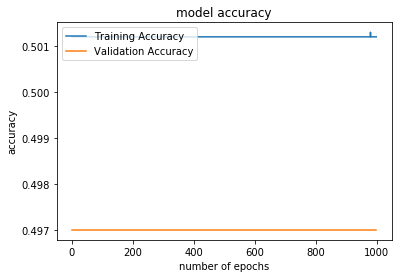

In [91]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accuracy')
plt.title('model accuracy')
plt.xlabel('number of epochs')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()
